# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Install citipy
!pip install citipy

     -------------------------------------- 557.7/557.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=5b42e2aee13febd466f9ec35db0917b716b6b0854142c9538a7f0e609eb8621b
  Stored in directory: c:\users\robco\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Datetime library will be used for title of first scatter plot
from datetime import date

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | bloemfontein
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | nanga eboko
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | gorontalo
Processing Record 10 of Set 1 | port augusta
Processing Record 11 of Set 1 | forst
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | vestmannaeyjar
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | kodiak
Processin

Processing Record 37 of Set 4 | hermanus
Processing Record 38 of Set 4 | vila franca do campo
Processing Record 39 of Set 4 | the pas
Processing Record 40 of Set 4 | beyneu
Processing Record 41 of Set 4 | placer
Processing Record 42 of Set 4 | isiro
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | ulaangom
Processing Record 45 of Set 4 | igrim
Processing Record 46 of Set 4 | sarkand
Processing Record 47 of Set 4 | yining
Processing Record 48 of Set 4 | lavrentiya
Processing Record 49 of Set 4 | frankenberg
Processing Record 0 of Set 5 | uslar
Processing Record 1 of Set 5 | rocha
Processing Record 2 of Set 5 | hofn
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | constitucion
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | amapa
Processing Record 7 of Set 5 | subang
Processing Record 8 of Set 5 | jega
Processing Record 9 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 5 | bom jesus
P

Processing Record 30 of Set 8 | marhaura
Processing Record 31 of Set 8 | burns lake
Processing Record 32 of Set 8 | brae
Processing Record 33 of Set 8 | aykhal
Processing Record 34 of Set 8 | kyren
Processing Record 35 of Set 8 | pisticci
Processing Record 36 of Set 8 | kampot
Processing Record 37 of Set 8 | ayan
Processing Record 38 of Set 8 | lexington
Processing Record 39 of Set 8 | pontes e lacerda
Processing Record 40 of Set 8 | palmer
Processing Record 41 of Set 8 | sao felix do xingu
Processing Record 42 of Set 8 | pyryatyn
Processing Record 43 of Set 8 | tonkino
Processing Record 44 of Set 8 | amparai
City not found. Skipping...
Processing Record 45 of Set 8 | yumen
Processing Record 46 of Set 8 | belyy yar
Processing Record 47 of Set 8 | sambava
Processing Record 48 of Set 8 | sahrak
City not found. Skipping...
Processing Record 49 of Set 8 | tobane
Processing Record 0 of Set 9 | xiangdong
City not found. Skipping...
Processing Record 1 of Set 9 | skalistyy
City not found. Ski

Processing Record 18 of Set 12 | mahon
Processing Record 19 of Set 12 | bonthe
Processing Record 20 of Set 12 | khor
Processing Record 21 of Set 12 | lorengau
Processing Record 22 of Set 12 | marsh harbour
Processing Record 23 of Set 12 | garowe
Processing Record 24 of Set 12 | chagda
City not found. Skipping...
Processing Record 25 of Set 12 | rio gallegos
Processing Record 26 of Set 12 | sao joao da barra
Processing Record 27 of Set 12 | grenville
Processing Record 28 of Set 12 | esil
Processing Record 29 of Set 12 | troitskoye
Processing Record 30 of Set 12 | maragogi
Processing Record 31 of Set 12 | arlit
Processing Record 32 of Set 12 | shahreza
Processing Record 33 of Set 12 | luocheng
Processing Record 34 of Set 12 | vanderhoof
Processing Record 35 of Set 12 | na wa
Processing Record 36 of Set 12 | menongue
Processing Record 37 of Set 12 | yuzhou
Processing Record 38 of Set 12 | vardo
Processing Record 39 of Set 12 | albox
Processing Record 40 of Set 12 | tsumeb
Processing Recor

In [10]:
# Set the API base URL
import pprint as pp
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
city = cities[1]
city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
city_weather = requests.get(city_url).json()
print(f"Latitude: {lats[1]}")
print(f"Longitude: {lngs[1]}")
pp.pprint(city_weather)

Latitude: -29.281724075943124
Longitude: 26.140297847773923
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -29.1211, 'lon': 26.214},
 'dt': 1680197872,
 'id': 1018725,
 'main': {'feels_like': 14.88,
          'humidity': 59,
          'pressure': 1019,
          'temp': 15.71,
          'temp_max': 15.71,
          'temp_min': 15.71},
 'name': 'Bloemfontein',
 'sys': {'country': 'ZA',
         'id': 1884,
         'sunrise': 1680150233,
         'sunset': 1680192921,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 1.03}}


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bloemfontein,-29.1211,26.2140,15.71,59,0,1.03,ZA,1680198583
1,east london,-33.0153,27.9116,17.52,77,0,7.72,ZA,1680198452
2,nanga eboko,4.6833,12.3667,25.96,60,66,1.51,CM,1680198583
3,te anau,-45.4167,167.7167,7.64,78,87,1.08,NZ,1680198309
4,port elizabeth,-33.9180,25.5701,17.83,80,20,7.72,ZA,1680198585


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bloemfontein,-29.1211,26.2140,15.71,59,0,1.03,ZA,1680198583
1,east london,-33.0153,27.9116,17.52,77,0,7.72,ZA,1680198452
2,nanga eboko,4.6833,12.3667,25.96,60,66,1.51,CM,1680198583
3,te anau,-45.4167,167.7167,7.64,78,87,1.08,NZ,1680198309
4,port elizabeth,-33.9180,25.5701,17.83,80,20,7.72,ZA,1680198585


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

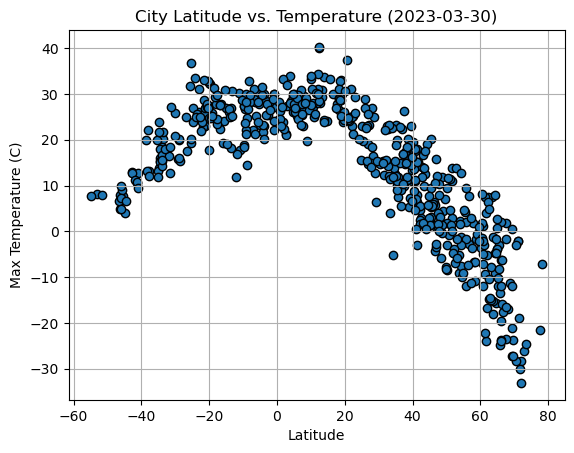

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs. Temperature ({date.today()})")
plt.grid()
            
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

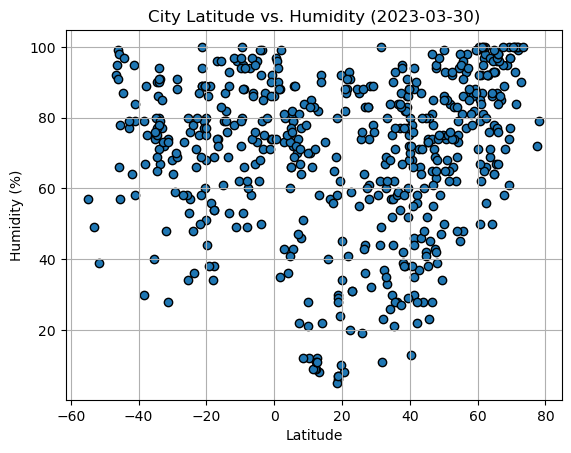

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({date.today()})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

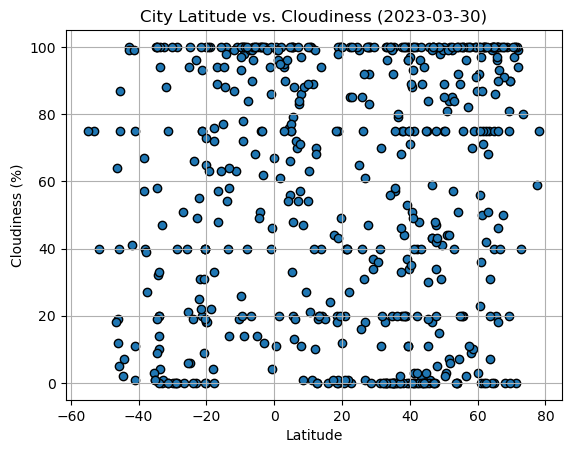

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

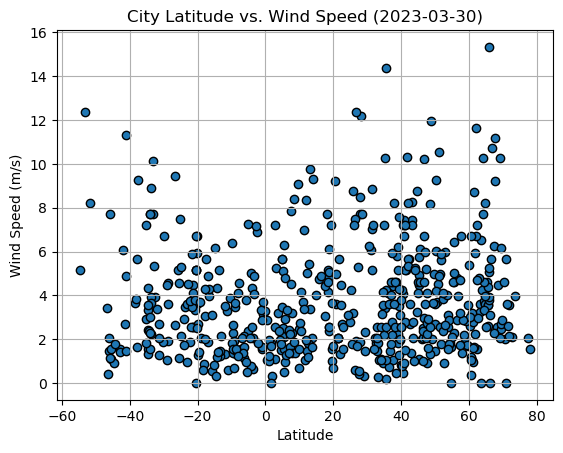

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def linRegressPlot(xvals, xlabel, yvals, ylabel, eq_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvals, yvals)
    print(f"The r-value is: {rvalue}")
    regress_values = xvals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvals, yvals)
    plt.plot(xvals, regress_values, 'r-')
    plt.annotate(line_eq, (eq_coords[0], eq_coords[1]), fontsize=12, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nanga eboko,4.6833,12.3667,25.96,60,66,1.51,CM,1680198583
6,gorontalo,0.5412,123.0595,24.44,97,100,1.06,ID,1680198585
8,forst,51.7333,14.6333,11.04,84,100,5.62,DE,1680198436
9,albany,42.6001,-73.9662,2.87,37,48,2.68,US,1680198203
11,anadyr,64.7500,177.4833,-15.72,78,40,4.00,RU,1680198585


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bloemfontein,-29.1211,26.2140,15.71,59,0,1.03,ZA,1680198583
1,east london,-33.0153,27.9116,17.52,77,0,7.72,ZA,1680198452
3,te anau,-45.4167,167.7167,7.64,78,87,1.08,NZ,1680198309
4,port elizabeth,-33.9180,25.5701,17.83,80,20,7.72,ZA,1680198585
5,punta arenas,-53.1500,-70.9167,8.06,49,75,12.35,CL,1680198236


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8875068507701449


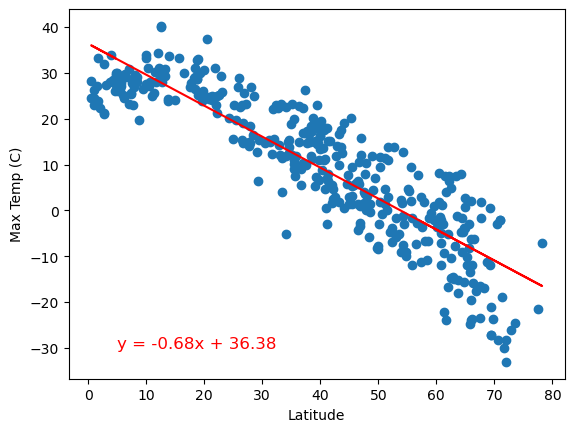

In [52]:
# Linear regression on Northern Hemisphere
eq_coords = [5, -30]
linRegressPlot(northern_hemi_df['Lat'], 'Latitude', 
               northern_hemi_df['Max Temp'], 'Max Temp (C)', eq_coords)

The r-value is: 0.7283637950087378


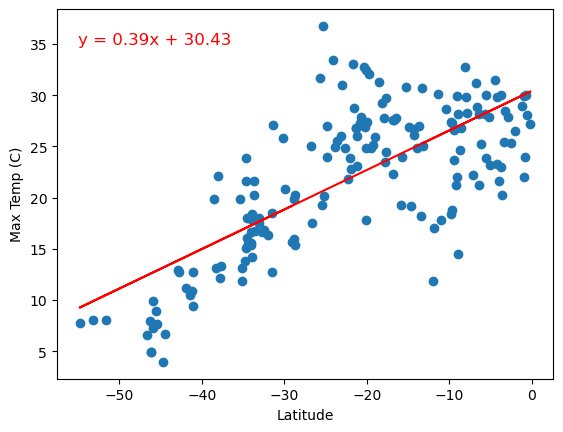

In [55]:
# Linear regression on Southern Hemisphere
eq_coords = [-55, 35]
linRegressPlot(southern_hemi_df['Lat'], 'Latitude',
              southern_hemi_df['Max Temp'], 'Max Temp (C)', eq_coords)

**Discussion about the linear relationship:** 
When separating the city data into northern and southern hemispheres, a linear correlation emerges between latitude and maximum temperature. The correlation is negative in the northern hemisphere and positive in the southern hemisphere. This result makes intuitive sense, because temperatures are highest around the equator. North of the equator (i.e., in the northern hemisphere), an increase in latitude increases the distance from the equator. South of the equator (i.e., in the southern hemisphere), an increase in latitutde decreases the distance from the equator. Therefore, increasing latitude generally results in lower temperatures in the northern hemisphere, and higher temperatures in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3648088186522994


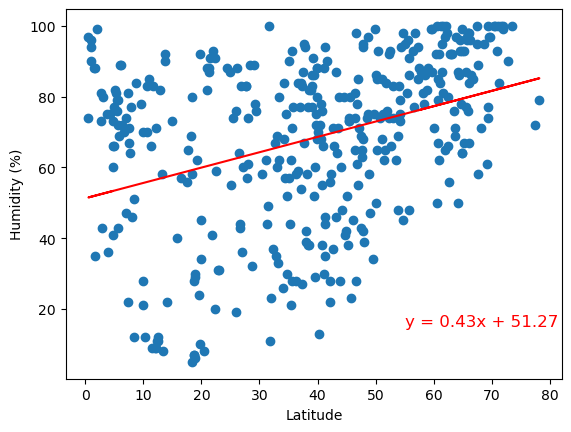

In [56]:
# Northern Hemisphere
eq_coords = [55, 15]
linRegressPlot(northern_hemi_df['Lat'], 'Latitude', 
               northern_hemi_df['Humidity'], 'Humidity (%)', eq_coords)

The r-value is: 0.1275569640447198


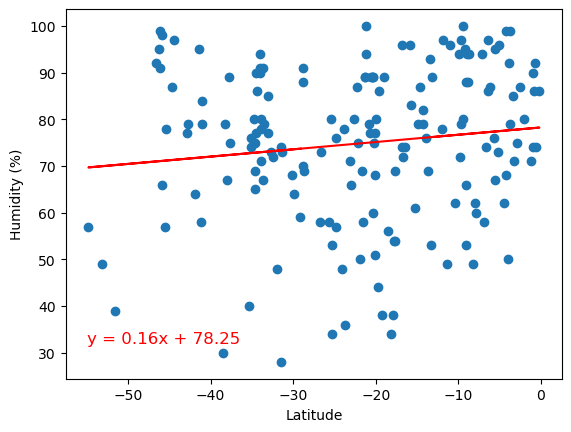

In [64]:
# Southern Hemisphere
eq_coords = [-55, 32]
linRegressPlot(southern_hemi_df['Lat'], 'Latitude', 
               southern_hemi_df['Humidity'], 'Humidity (%)', eq_coords)

**Discussion about the linear relationship:**
The correlation between latitude and humidity is much weaker than the correlation between latitude and maximum temperature. Furthermore, in the northern hemisphere, we see an unexpected positive correlation between latitude and humidity. That is, our sample shows humidity increasing in cities that are further north from the equator. Therefore, it likely that other meteorological factors, such as seasonality, have an impact on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07134325508918324


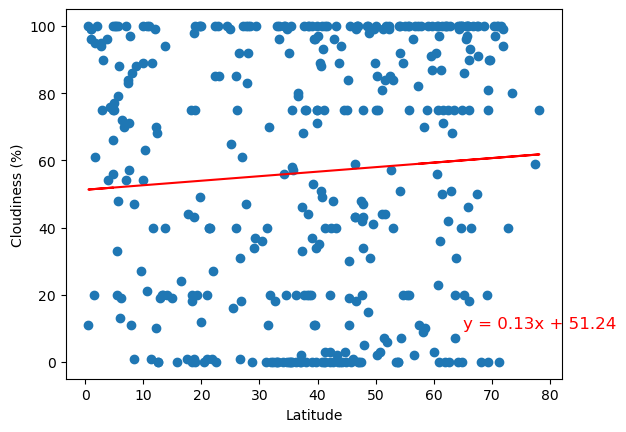

In [61]:
# Northern Hemisphere
eq_coords = [65, 10]
linRegressPlot(northern_hemi_df['Lat'], 'Latitude', 
               northern_hemi_df['Cloudiness'], 'Cloudiness (%)', eq_coords)

The r-value is: 0.3279496194230331


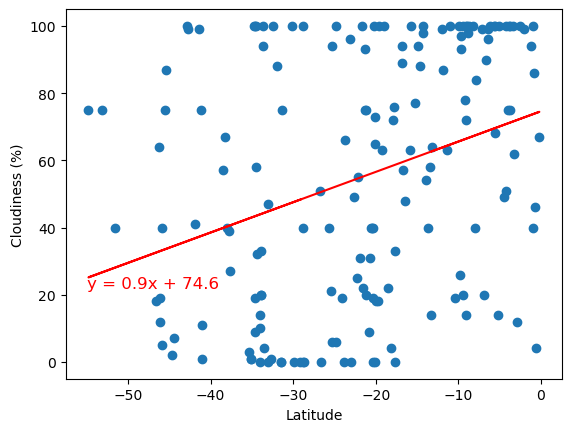

In [63]:
# Southern Hemisphere
eq_coords = [-55, 22]
linRegressPlot(southern_hemi_df['Lat'], 'Latitude', 
               southern_hemi_df['Cloudiness'], 'Cloudiness (%)', eq_coords)

**Discussion about the linear relationship:**
The correlation between latitude and cloudiness is much weaker than the correlation between latitude and maximum temperature. We see a positive correlation in both hemispheres, though the correlation is de minimis in the northern hemisphere, with an r-value of 0.07. Therefore, it likely that other meteorological factors, such as seasonality, have an impact on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10558972760618719


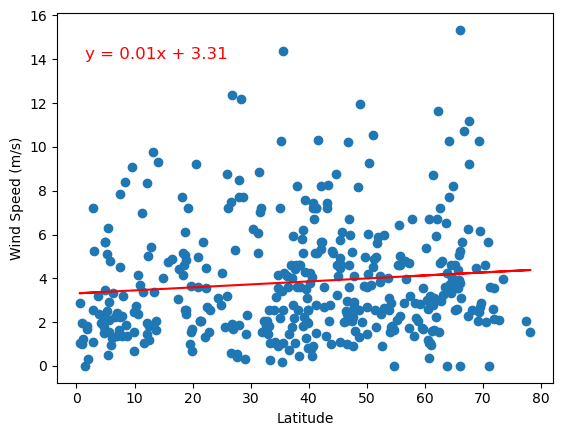

In [67]:
# Northern Hemisphere
eq_coords = [1.5, 14]
linRegressPlot(northern_hemi_df['Lat'], 'Latitude', 
               northern_hemi_df['Wind Speed'], 'Wind Speed (m/s)', eq_coords)

The r-value is: -0.229400139733581


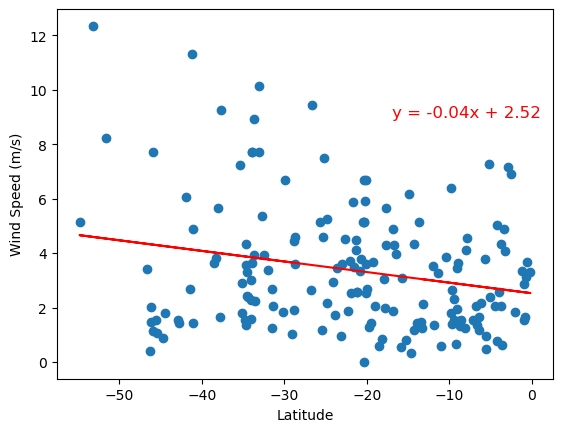

In [74]:
# Southern Hemisphere
eq_coords = [-17, 9]
linRegressPlot(southern_hemi_df['Lat'], 'Latitude', 
               southern_hemi_df['Wind Speed'], 'Wind Speed (m/s)', eq_coords)

**Discussion about the linear relationship:**
The correlation between latitude and cloudiness is much weaker than the correlation between latitude and maximum temperature. We see a weak positive correlation in northern hemisphere  (i.e., more wind further away from the equator), and a weak negative correlation in the southern hemisphere (i.e., more wind closer to the equator). Therefore, it likely that other meteorological factors, such as seasonality, have an impact on wind speed.